In [2]:
import hablo_parser as hablo
import matplotlib.pyplot as plt
import numpy as np
import yaml 

In [3]:
config = yaml.load(open('perfect_foresight_normalized_lite.yaml', 'r'), Loader= hablo.get_loader())

In [4]:
config

{'calibration': {'CRRA': 2.0,
  'LivPrb': 0.98,
  'DiscFac': 0.96,
  'PermGroFac': 1.01,
  'Rfree': 1.03,
  'BoroCnstArt': 'None'},
 'agents': {'consumer': {'count': 100}},
 'dynamics': {'p': 'PermGroFac * p',
  'r_eff': 'Rfree / PermGroFac',
  'b_nrm': 'r_eff * a_nrm',
  'm_nrm': 'b_nrm + 1',
  'c_nrm': <hablo_parser.Control at 0x7f37e10d0d90>,
  'a_nrm': 'm_nrm - c_nrm',
  'u': 'c ** (1 - CRRA) / (1 - CRRA)'},
 'shocks': {'live': <hablo_parser.Bernoulli at 0x7f37e10d0df0>}}

In [5]:
config['dynamics']

{'p': 'PermGroFac * p',
 'r_eff': 'Rfree / PermGroFac',
 'b_nrm': 'r_eff * a_nrm',
 'm_nrm': 'b_nrm + 1',
 'c_nrm': <hablo_parser.Control at 0x7f37e10d0d90>,
 'a_nrm': 'm_nrm - c_nrm',
 'u': 'c ** (1 - CRRA) / (1 - CRRA)'}

In [6]:
hablo.math_text_to_lambda(config['dynamics']['p'])

<function _lambdifygenerated(PermGroFac, p)>

In [7]:
hablo.math_text_to_lambda(config['dynamics']['r_eff'])

<function _lambdifygenerated(PermGroFac, Rfree)>

In [8]:
hablo.math_text_to_lambda(config['dynamics']['m_nrm'])

<function _lambdifygenerated(b_nrm)>

In [9]:
hablo.math_text_to_lambda(config['dynamics']['a_nrm'])

<function _lambdifygenerated(m_nrm, c_nrm)>

In [10]:
hablo.math_text_to_lambda(config['dynamics']['u'])

<function _lambdifygenerated(CRRA, c)>

In [11]:
config['dynamics']['a_nrm']

'm_nrm - c_nrm'

In [14]:
a_hexp = hablo.HabloExpression(config['dynamics']['a_nrm'])

In [15]:
a_hexp.expr

-c_nrm + m_nrm

In [16]:
a_hexp.diffs

{'m_nrm': 1, 'c_nrm': -1}

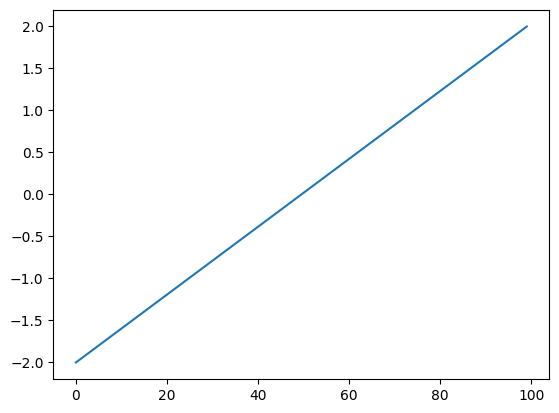

In [22]:
x = np.linspace(0,4,100)

plt.plot(a_hexp.npf(x, 2))

In [31]:
x

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

In [18]:
u_hexp = hablo.HabloExpression(config['dynamics']['u'])

In [19]:
u_hexp.expr

c**(1 - CRRA)/(1 - CRRA)

In [20]:
u_hexp.diffs

{'CRRA': -c**(1 - CRRA)*log(c)/(1 - CRRA) + c**(1 - CRRA)/(1 - CRRA)**2,
 'c': c**(1 - CRRA)/c}

In [27]:
u_hexp.npf(y, 2)

array([ 2.00000000e+00,  2.02665002e+00,  2.05730244e+00,  2.09246139e+00,
        2.13272955e+00,  2.17883307e+00,  2.23165450e+00,  2.29227673e+00,
        2.36204280e+00,  2.44263844e+00,  2.53620817e+00,  2.64552209e+00,
        2.77422114e+00,  2.92718767e+00,  3.11112271e+00,  3.33547862e+00,
        3.61403119e+00,  3.96766886e+00,  4.42966130e+00,  5.05642559e+00,
        5.95189179e+00,  7.33085351e+00,  9.72053765e+00,  1.48532710e+01,
        3.37004780e+01, -9.83092737e+01, -1.91188451e+01, -1.03282400e+01,
       -6.95284665e+00, -5.17004417e+00, -4.06968741e+00, -3.32412625e+00,
       -2.78648489e+00, -2.38110158e+00, -2.06503449e+00, -1.81210079e+00,
       -1.60542812e+00, -1.43365439e+00, -1.28884845e+00, -1.16530615e+00,
       -1.05882023e+00, -9.66219685e-01, -8.85069386e-01, -8.13468465e-01,
       -7.49911525e-01, -6.93190986e-01, -6.42326991e-01, -5.96516227e-01,
       -5.55093948e-01, -5.17505391e-01, -4.83283993e-01, -4.52034579e-01,
       -4.23420256e-01, -

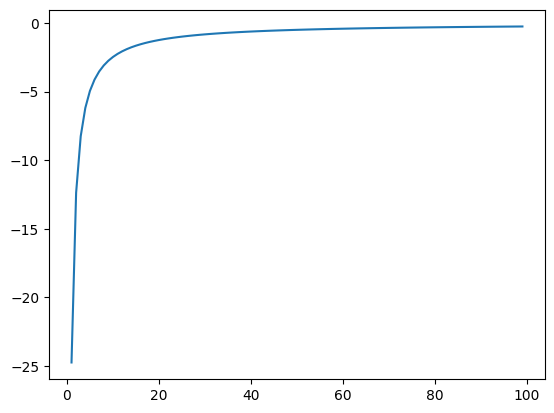

In [34]:
y = np.linspace(0,4,100)

plt.plot(u_hexp.npf(**{'CRRA' : 2, 'c': y}))

In [26]:
y

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

## Extending block

In [28]:
new_block = config.copy()

In [29]:

new_block['calibration']['RiskyStd'] = 2
new_block['dynamics']['share'] = hablo.Control(['a_nrm'])
new_block['dynamics']['r_eff'] = 'Rfree * (1 - share) * R_risky * share / PermGroFac'
new_block['shocks']['R_risky'] = hablo.MeanOneLogNormal('RiskyStd')

In [30]:
new_block

{'calibration': {'CRRA': 2.0,
  'LivPrb': 0.98,
  'DiscFac': 0.96,
  'PermGroFac': 1.01,
  'Rfree': 1.03,
  'BoroCnstArt': 'None',
  'RiskyStd': 2},
 'agents': {'consumer': {'count': 100}},
 'dynamics': {'p': 'PermGroFac * p',
  'r_eff': 'Rfree * (1 - share) * R_risky * share / PermGroFac',
  'b_nrm': 'r_eff * a_nrm',
  'm_nrm': 'b_nrm + 1',
  'c_nrm': <hablo_parser.Control at 0x7f37e10d0d90>,
  'a_nrm': 'm_nrm - c_nrm',
  'u': 'c ** (1 - CRRA) / (1 - CRRA)',
  'share': <hablo_parser.Control at 0x7f37de756100>},
 'shocks': {'live': <hablo_parser.Bernoulli at 0x7f37e10d0df0>,
  'R_risky': <hablo_parser.MeanOneLogNormal at 0x7f37de7561c0>}}

## What about indexed symbols? Not out of the box...

We will need to build something extra to handle indexed symbols.

In [22]:
hablo.math_text_to_lambda('Rfree / PermGroFac[age]')

TypeError: 'Symbol' object is not subscriptable